# Pandas Review

Pandas is a Python package for organizing and analyzing data. In one sense, it is a generalization of NumPy, on which it is based.

NumPy is fantastic for working with numerical data that are "well behaved". For example, if you are analyzing data from a tightly controlled laboratory experiment, then NumPy might be perfect.

In the broader world of behavioral data science, however, data can be complicated. Variables can be of multiple types, values can be missing, etc. Pandas was developed to make it easier for us to work with data sets in general, not just numerical arrays.

If you have experience in R then, in a nutshell, pandas gives you an equivalent to R in Python (some data scientists use both, picking one or the other depending on the project, but most people prefer sticking with one language if they can).

## Pandas Data

The main data object in pandas is the `DataFrame`. It is a table of data in which each column has a name, generally corresponding to a specific real-world variable. 

Just as we can think about a NumPy array as a spatial layout of a Python list of lists, we can think of a pandas `DataFrame` as a spatial layout of a Python dictionary.

Consider the following Python dictionary:

In [1]:
dis_chars = {'name': ['Mickey', 'Minnie', 'Pluto'],
             'gender': ['m', 'f', 'n'],
             'age': [95, 95, 93],}

In [2]:
dis_chars

{'name': ['Mickey', 'Minnie', 'Pluto'],
 'gender': ['m', 'f', 'n'],
 'age': [95, 95, 93]}

On the one hand, this is a nice organized *container* of data. But on the other hand, it is not much else. If we wanted to compute anything, like the mean age of all non-male characters, we'd have to start writing code from scratch.

Let's make our dictionary into a `DataFrame`. First, we'll import pandas.

In [3]:
import pandas as pd

Importing pandas as `pd` is conventional, like importing numpy as `np`, so there's no reason to do anything else.

Now we can convert our data to a `DataFrame` using `pd.DataFrame()`.

In [4]:
dis_df = pd.DataFrame(dis_chars)

And let's look at our new creation!

In [5]:
dis_df

,name,gender,age
0,Mickey,m,95
1,Minnie,f,95
2,Pluto,n,93


Now we have a nice organized table of data, in which each column corresponds to a variable, and can be referred to by name. 

In [6]:
dis_df['name']

0    Mickey
1    Minnie
2     Pluto
Name: name, dtype: object

Further, it makes it relatively easy for us to do lots of analyses "out of the box". For example:

In [7]:
dis_df['age'].mean()

94.33333333333333

Here, we just grabbed a column of data by name (`dis_df['age']`), and then computed its mean with the built-in `mean()` method.

The `DataFrame` isn't the only type of object in pandas, but it's the biggie. If you have experience in R, then you'll be in familiar territory, because the `DataFrame` in Python is modeled after the data frame (or tibble) in R.

In [8]:
type(dis_df)

pandas.core.frame.DataFrame

Each column of a `DataFrame` is a pandas `Series`.

In [9]:
dis_age_s = dis_df['age']
dis_age_s

0    95
1    95
2    93
Name: age, dtype: int64

In [10]:
type(dis_age_s)

pandas.core.series.Series

And each series is a collection of more fundamental objects. So if we look at the last age in our series...

In [12]:
a = dis_age_s[2]
a

93

And check the type...

In [13]:
type(a)

numpy.int64

We see that it is a numpy integer; a hint that pandas is indeed built from NumPy!

If we check the type of one of the other values:

In [14]:
type(dis_df['gender'][2])

str

We see that it is a Python string object. (Take a moment to dissect that line of code, and see how it is doing exactly the same thing as we did to get the type of an age value, just in one go.)

---

In the code cell below, get the very first name in our Disney `DataFrame`.

In [15]:
# At first, Mickey's name was going to be Mortimer Mouse. I know, right?
dis_df['name'][0]

'Mickey'

---

One great thing about pandas is that, if we want to add a column, we just act like it already exists and assign values to it. Like this:

In [16]:
dis_df['wearsBow'] = [False, True, False]
dis_df

,name,gender,age,wearsBow
0,Mickey,m,95,False
1,Minnie,f,95,True
2,Pluto,n,93,False


Notice that we are addressing a 'wearsBow' column just like we would an existing column such as 'name'. Pandas, rather than complain and be annoying, just creates the column for us!

## Data i/o (Input and Output)

One of the really great things about pandas is that it makes reading, inspecting, and writing data files in common formats very easy. 

### Importing (input)

Following the pandas documentation, let's look at some data about the passengers on the RMS Titanic. 

Download the titanic.csv and place in folder named 'data' that is in the same folder as you have this notebook.

Now, loading it is as easy as calling `pd.read_csv()`:

In [17]:
In [2]: titanic = pd.read_csv("data/titanic.csv")

There are lots of other formats that pandas can read, including excel and html. 

It can even read data from the clipboard! Try it! Go to the [Wikepedia page for Austin](https://en.wikipedia.org/wiki/Austin,_Texas), scroll to the demographics section, and select the three columns (including the headers) down to 2020, and copy them to your clipboard.

Now run the code below.

In [23]:
atx_pop = pd.read_clipboard()

In [24]:
atx_pop

,Racial composition,2020[112],2010[113],2000[114],1990[112],1970[112],1950[112]
0,White (Non-Hispanic),47.1%,48.7%,56.4%,61.7%,73.4%,86.6%
1,Hispanic or Latino,32.5%,35.1%,28.2%,23.0%,14.5%,NaN
2,Asian,8.9%,6.2%,4.5%,3.0%,0.2%,0.1%
3,Black or African American,6.9%,7.7%,9.3%,12.4%,11.8%,13.3%
4,Mixed,3.9%,1.7%,2.9%,NaN,NaN,NaN


### Inspecting

It's important to peek at any imported data to make sure nothing looks funny (like we just did with the Austin population data). So let's peek at the RMS Titanic data.

In [25]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


A nice thing about pandas `DataFrames` is that, by default, they show you their first and last 5 rows (their head and tail), and then tell you how big they are (891x12 in this case).

We can look at as much of the head or tail as we want with the `head()` and `tail()` methods.

In [26]:
titanic.tail(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


---

Use the cell below to display the first 11 rows of the titanic data.

In [29]:
# but these rows go to 11...
titanic.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


---

We can also look at the data types:

In [30]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

(the columns listed as "object" seem to be strings)

We can also get more detailed information using the `info()` method:

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This gives us a nice summary of the types of data in the columns and, in particular, how many valid (non-missing) values are in each. We can see that "Cabin", for example, has many missing values.

### Exporting (output)

The `to_` methods, such as `to_csv()`, `to_excel()`, etc., allow us to export data in many ways. As an example, let's export the titanic data as a Microsoft Excel file.

---

In the cell below, use `titanic.to_excel(...)` to export the data to an Excel spreadsheet.

In [38]:
# exporting an Excel file!
titanic.to_excel('titanic.xlsx')

Open the file in Excel to verify that the export worked.

---

## Selecting Data

In numpy, we select data by primarily by row and column indexes. In pandas, we generally address columns (corresponding to real world variables) by *name* and rows by one or more *criteria*.

### Getting columns

As we did above with our little toy Disney data, we can compute the mean age of the passengers by grabbing that column of data by name, and then computing the mean of it.

In [39]:
ages = titanic['Age']
ages.mean()

29.69911764705882

---

In the cell below, compute the mean age in one line of code (i.e., not creating the temporary 'age' object).

In [40]:
# average age of passengers on the RMS Titanic
titanic['Age'].mean()

29.69911764705882

---

We can get multiple columns by indexing our `DataFrame` with a Python list of column names. We can do this in two lines for readability.

In [41]:
wanted_cols = ['Fare', 'Survived']
fare_surv = titanic[wanted_cols]

In [42]:
fare_surv

,Fare,Survived
0,7.2500,0
1,71.2833,1
2,7.9250,1
3,53.1000,1
4,8.0500,0
...,...,...
886,13.0000,0
887,30.0000,1
888,23.4500,0
889,30.0000,1


But more commonly we do it in a single line.

In [43]:
fare_surv = titanic[['Fare', 'Survived']]

In [44]:
fare_surv

,Fare,Survived
0,7.2500,0
1,71.2833,1
2,7.9250,1
3,53.1000,1
4,8.0500,0
...,...,...
886,13.0000,0
887,30.0000,1
888,23.4500,0
889,30.0000,1


Your initial reaction might be "Why the double brackets? Why not single brackets?", and the reason should be clear if we look back at the two line example: the `DataFrame` expects a Python list, not separate strings. So the outer set of brackets are indexing brackets, and the inner set defines a Python list.

### Getting rows

We generally extract rows of interest by placing one or more criterea on a particular column. 

In [45]:
my_critereon = fare_surv['Fare'] > 20
rich = fare_surv[my_critereon]

In [48]:
rich

,Fare,Survived
1,71.2833,1
3,53.1000,1
6,51.8625,0
7,21.0750,0
9,30.0708,1
...,...,...
880,26.0000,1
885,29.1250,0
887,30.0000,1
888,23.4500,0


What is actually happening here is that the logical test `fare_surv['Fare'] > 20` is creating a pandas series that is `True` for the rows in which the fare paid was greater than 20 pounds sterling, and `False` otherwise. 

Let's look at `my_critereon`:

In [46]:
my_critereon

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888     True
889     True
890    False
Name: Fare, Length: 891, dtype: bool

This series is then used to get all the rows of `fare_surv` that correspond to the `True` values, and these are placed in `rich`.

This is known as ***logical indexing***, and is widely used in data analysis!

As with fetching columns, we can do this one line instead of two.

In [49]:
rich = fare_surv[fare_surv['Fare'] > 20]

In [50]:
rich

,Fare,Survived
1,71.2833,1
3,53.1000,1
6,51.8625,0
7,21.0750,0
9,30.0708,1
...,...,...
880,26.0000,1
885,29.1250,0
887,30.0000,1
888,23.4500,0


Whether you make a separate indexing series like `my_critereon` or put the test inside the indexing brackets is up to you. For simple tests, putting the test inside the brackets doesn't hurt the readability of the code at all. For more complicated tests – if you wanted all the cases of female passengers that paid between 20 and 50 lbs. for their fare, and had no siblings and two parents aboard, say – then you might want to make the test series first, and then do the indexing. 

---

In the cell below, get the passenger class (`Pclass`) and survival status of passengers that paid more than 20 pounds for their voyage.

In [51]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
# passenger class and survival of high fares
pass_pclass_survived = titanic[['Pclass','Survived','Fare']]

In [74]:
pass_pclass_survived = pass_pclass_survived[pass_pclass_survived['Fare'] > 20]

In [75]:
pass_pclass_survived

,Pclass,Survived,Fare
1,1,1,71.2833
3,1,1,53.1000
6,1,0,51.8625
7,3,0,21.0750
9,2,1,30.0708
...,...,...,...
880,2,1,26.0000
885,3,0,29.1250
887,1,1,30.0000
888,3,0,23.4500


Now fetch the same for passengers that paid 20 pounds or less for their voyage.

In [77]:
# passenger class and survival of low fares
pass_pclass_low = titanic[['Pclass','Survived','Fare']]
pass_pclass_low = pass_pclass_low[pass_pclass_low['Fare'] < 20]
pass_pclass_low

,Pclass,Survived,Fare
0,3,0,7.2500
2,3,1,7.9250
4,3,0,8.0500
5,3,0,8.4583
8,3,1,11.1333
...,...,...,...
882,3,0,10.5167
883,2,0,10.5000
884,3,0,7.0500
886,2,0,13.0000


Finally, get the class and survival status for passengers that paid either less than 10 lbs. **or** more than 50 lbs. for their fare. 

In [96]:
# ppl paying a little *or* a lot
pass_pclass_extreme = titanic[['Pclass','Survived','Fare']]
pass_pclass_extreme = pass_pclass_extreme[(pass_pclass_extreme['Fare'] < 10) | (pass_pclass_extreme['Fare'] > 50)]

In [97]:
pass_pclass_extreme

,Pclass,Survived,Fare
0,3,0,7.2500
1,1,1,71.2833
2,3,1,7.9250
3,1,1,53.1000
4,3,0,8.0500
...,...,...,...
878,3,0,7.8958
879,1,1,83.1583
881,3,0,7.8958
884,3,0,7.0500


If you did the above in two steps, see if you can do it in one go instead! There are hints just above.

---

## Basic Plotting

`DataFrame` objects know how to plot themselves! Or, more precisely, `DataFrame` objects have methods for plotting. Let's try!

<AxesSubplot:>

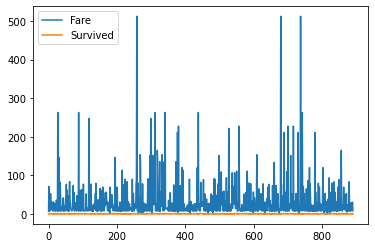

In [98]:
import matplotlib as plt
fare_surv.plot()

As a graph, this one isn't very informative, but it does show us what the default `DataFrame.plot()` method does: it plots (numerical) data by row index. This could be quite useful if a data frame were sorted on a particular variable...

Other type of plots are reached through plot, like `fare_surv.plot.scatter()` or similar. We can see what methods are available by hitting the \<TAB\> key after `DataFrame.plot.`
    
Do this below;

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

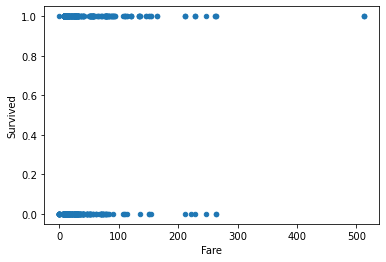

In [118]:
fare_surv.plot.scatter(x = 'Fare', y = 'Survived')

So there *is* a `scatter()` available, along with many of our other `matplotlib` friends. 

Let's try a scatter plot Fare vs. Survival.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

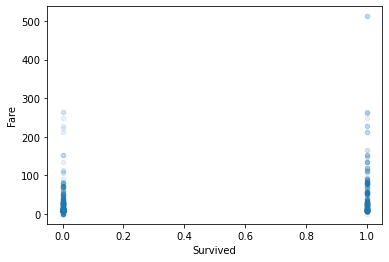

In [111]:
fare_surv.plot.scatter(x="Survived", y="Fare", alpha = 0.1)

Looks like those 500 lb. fares were worth it.

---

Use the cell below to make a box plot of the ***column*** `Fare` ***by*** the variable `Survived`.

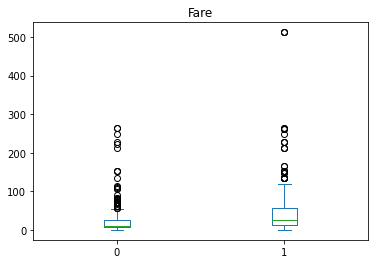

In [126]:
# boxplot of Fare paid by Survival status
fare_surv.plot.box(by = 'Survived',column = 'Fare');

---

## Calculating New Columns

We often want to compute new columns based on existing ones. Pandas makes this really easy!

Let's use numpy to make a toy data set of annual wages and income-from-interest for 10 people.

In [121]:
import numpy as np

In following code, you should be able to understand the numpy bit up top. The pandas bit further down should sort of make sense, but don't worry if you don't fully understand it. You can come back and look at it again after you've finished this tutorial.

In [127]:
# make some incomes in thousands of US dollars
rng = np.random.default_rng(seed=42)
raw_dat = rng.integers(0,100,size=(10, 2))
raw_dat[:,0] = raw_dat[:,0] + 100
raw_dat[4,1] = raw_dat[4,1] + 200 

# make initial column names
col_names = ['wage', 'interest'] 

# make the initial pandas data frame
incomes = pd.DataFrame(raw_dat, columns = col_names) 

# add a gender column 
gender = ['f', 'm', 'n', 'f', 'f', 'n', 'm', 'm', 'f', 'f']
incomes['gender'] = gender

# look at our new data frame
incomes

,wage,interest,gender
0,108,77,f
1,165,43,m
2,143,85,n
3,108,69,f
4,120,209,f
5,152,97,n
6,173,76,m
7,171,78,m
8,151,12,f
9,183,45,f


One obvious thing to look at from a behavioral science perspective would be total income. After all, money is money...

So we'll make a new column for total income, and set it to the sum of the wage and interest columns. To do this, we address our desired column as though it already exists, and make it equal to what we want (the sum of wage and interest income, in this case).

In [129]:
incomes['total'] = incomes['wage'] + incomes['interest']
incomes

,wage,interest,gender,total
0,108,77,f,185
1,165,43,m,208
2,143,85,n,228
3,108,69,f,177
4,120,209,f,329
5,152,97,n,249
6,173,76,m,249
7,171,78,m,249
8,151,12,f,163
9,183,45,f,228


*All of the **arithmetic** and **logical** operators can be used to create new columns based on existing ones.*

We can also use scaler multipliers or addends, etc. (like we did when we created the raw data with numpy just above). The scaler will be "broadcast" to each element of the column.

For example, if we wanted to know the total income in Euros, we could do this:

In [130]:
dol2eu = 0.94 # 0.94 euros per US dollar (early 2023)
incomes['total_eu'] = dol2eu * incomes['total']
incomes

,wage,interest,gender,total,total_eu
0,108,77,f,185,173.90
1,165,43,m,208,195.52
2,143,85,n,228,214.32
3,108,69,f,177,166.38
4,120,209,f,329,309.26
5,152,97,n,249,234.06
6,173,76,m,249,234.06
7,171,78,m,249,234.06
8,151,12,f,163,153.22
9,183,45,f,228,214.32


---

In the cell below, add a Boolean (True/False) column that shows if each person's wages exceeds their income from interest.

In [135]:
# adding a wages vs incomes comparison column

incomes['wages_exceeds'] = incomes['wage'] > incomes['interest']
incomes

,wage,interest,gender,total,total_eu,wages_exceeds
0,108,77,f,185,173.90,True
1,165,43,m,208,195.52,True
2,143,85,n,228,214.32,True
3,108,69,f,177,166.38,True
4,120,209,f,329,309.26,False
5,152,97,n,249,234.06,True
6,173,76,m,249,234.06,True
7,171,78,m,249,234.06,True
8,151,12,f,163,153.22,True
9,183,45,f,228,214.32,True


---

## Summary Statistics

Getting summary statistics is also something that pandas makes really easy. 

### Simple descriptive statistics

We can get a quick look an entire `DataFrame` with its `describe()` method (similar to `summary()` in R).

In [136]:
incomes.describe()

,wage,interest,total,total_eu
count,10.000000,10.000000,10.000000,10.000000
mean,147.400000,79.100000,226.500000,212.910000
std,27.281251,51.977452,47.815037,44.946135
min,108.000000,12.000000,163.000000,153.220000
25%,125.750000,51.000000,190.750000,179.305000
50%,151.500000,76.500000,228.000000,214.320000
75%,169.500000,83.250000,249.000000,234.060000
max,183.000000,209.000000,329.000000,309.260000


Notice that `describe()` handled the presence of a string column gracefully by ignoring it rather than producing an error.

If we hit the \<TAB\> key after `incomes.`, we'll see that `DataFrame` objects have a LOT of methods!

In [ ]:
incomes.

If we browse around a little, we see that all the common summary statistics like mean, median, standard deviation, etc. are there, and they all have reasonable names. Let's compute the mean

In [150]:
incomes.mean()

/var/folders/yq/3rc62cqs3nn_n_c8mm6k56jw0000gn/T/ipykernel_838/1563429750.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  incomes.mean()


wage             147.40
interest          79.10
total            226.50
total_eu         212.91
wages_exceeds      0.90
dtype: float64

That worked, but it complained (at least my version of pandas did). It wants us to pick only valid (numeric) columns over which to compute the mean. Okay.

In [139]:
incomes[['wage', 'interest']].mean()

wage        147.4
interest     79.1
dtype: float64

---

Compute the standard deviation of total income (in Euros, if you prefer)

In [140]:
# deviation of total income
incomes['total'].std()

47.81503715127468

---

Pro tip: if you *do* want to compute a statistic on *all* the numeric columns on large data frame, you can save typing with `DataFrame.mean(numeric_only = True)`. Try it!

In [142]:
incomes.mean(numeric_only = True)

wage             147.40
interest          79.10
total            226.50
total_eu         212.91
wages_exceeds      0.90
dtype: float64

### Computing statistics by group

We can also easily compute statistics separately based on a grouping variable, like 'gender' for the incomes data.

Here's our grouping variable:

In [143]:
incomes['gender']

0    f
1    m
2    n
3    f
4    f
5    n
6    m
7    m
8    f
9    f
Name: gender, dtype: object

And now we'll use it in our data frame's `groupby()` method. Like this.

In [144]:
incomes[['total', 'gender']].groupby('gender').mean()

,total
gender,
f,216.400000
m,235.333333
n,238.500000


If you are coming from the R/tidyverse world (e.g. if you took PSY420 recently), you'll recognize this command as similar to using the pipe (`%>%`).

What's happening is that 

- `incomes[['total', 'gender']]` creates a data frame
- `groupby('gender')` creates another data frame grouped by gender
- `mean()` computes the mean on the grouped data frame

So we could (almost) turn this directly into R code that uses the pipe:
```
incomes[['total', 'gender']] %>%
groupby('gender') %>%
mean()
```

How many people were in each group? Just use the `value_counts()` method!

In [145]:
incomes['gender'].value_counts()

f    5
m    3
n    2
Name: gender, dtype: int64

---

In the cell below, compute the survival rate for passengers on the RMS Titanic grouped by passenger class. 

(*hint* - having the Survived variable coded as 0 or 1 works to your advantage)

In [146]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
titanic[['Survived','Pclass']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


---

### Multiple statistics using aggregation

We can compute many things at once using the `agg()` (aggregate) method. To use this method, we pass it a dictionary in which the keys are column names and the values are lists of valid statistics (i.e. methods that `DataFrames` know about). Like this.

In [148]:
my_stats_dict = {
         "wage": ["mean", "std"],
         "interest": ["mean", "std"],
         "total": ["mean", "std"]
     }

incomes.agg(my_stats_dict)


,wage,interest,total
mean,147.400000,79.100000,226.500000
std,27.281251,51.977452,47.815037


You can do the above in one go (rather than defining a separate `my_stats_dict` object), but it looks a bit messy in our opinion.